In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

C:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Задание:


-показать понедельную динамику посещаемости сайта за сентябрь-ноябрь 2016. 

Показатели: визиты, просмотры, среднедневное кол-во визитов на посетителя

-рассчитать по каждой отчётной неделе (пн-вс) изменение за неделю и за год (неделя 2016 г. к той же неделе 2015 г.)

-построить помесячный прогноз трафика проекта на 2017 год (по визитам)

-визуализировать полученные данные


In [4]:
df = pd.read_csv('Analyst_RBK.csv', parse_dates=['Интервал дат визита'])

In [15]:
df.set_index('Интервал дат визита', inplace=True)

In [11]:
countStr = df['Посетители'].str.replace('\xa0', '')

In [12]:
df['Посетители'] = countStr.astype('int')

In [25]:
df

,Визиты,Посетители,Просмотры
Интервал дат визита,,,
2015-01-01,73800,66742,141136
2015-01-02,94070,85086,179118
2015-01-03,95847,86782,184094
2015-01-04,83911,75901,160691
2015-01-05,105634,94929,206353
...,...,...,...
2016-12-27,99726,90120,201104
2016-12-28,80770,72738,182035
2016-12-29,98796,89426,208137


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2015-01-01 to 2016-12-31
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Визиты      731 non-null    int32
 1   Посетители  731 non-null    int32
 2   Просмотры   731 non-null    int32
dtypes: int32(3)
memory usage: 14.3 KB


задание 1

-показать понедельную динамику посещаемости сайта за сентябрь-ноябрь 2016. 

In [62]:
#Ресемплируем датасет по неделям, начиная с понидельника
df_resampled = df.resample('W-MON', label='left', closed='left').sum()

In [63]:
df_resampled

,Визиты,Посетители,Просмотры
Интервал дат визита,,,
2014-12-29,347628,314511,665039
2015-01-05,783763,704403,1571735
2015-01-12,1030030,919881,1967587
2015-01-19,997147,892820,1896072
2015-01-26,1095311,981711,2025337
...,...,...,...
2016-11-28,627926,569758,2859388
2016-12-05,502348,459852,1095493
2016-12-12,651607,597731,1289806


In [64]:
# фильтруем по нужным датам
df_resampled_weekly = df_resampled.loc['2016-09-01':'2016-11-30']

In [67]:
df_resampled_weekly

,Визиты,Посетители,Просмотры
Интервал дат визита,,,
2016-09-05,702995,628002,1094608
2016-09-12,550150,492660,915271
2016-09-19,551580,495837,915621
2016-09-26,745469,663834,1259742
2016-10-03,716212,650821,1176854
2016-10-10,735614,668019,1175813
2016-10-17,614995,555999,998737
2016-10-24,1113021,1017786,1667133
2016-10-31,748898,685437,1200441


<AxesSubplot:xlabel='Интервал дат визита'>

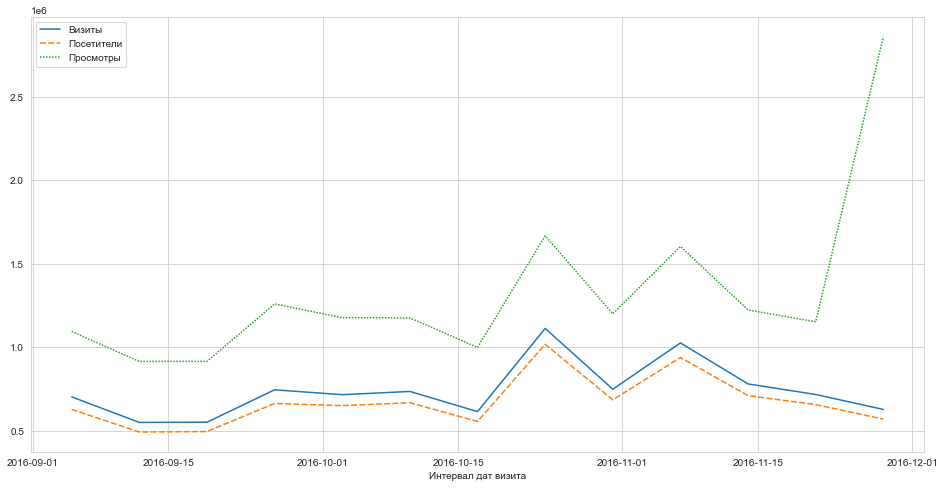

In [70]:
#строим график
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.lineplot(data=df_resampled_weekly)

In [68]:
# среднедневное кол-во визитов на посетителя
daily_average_visits_per_client = df_resampled_weekly['Визиты'] / df_resampled_weekly['Посетители'] / 7 

In [69]:
daily_average_visits_per_client 

Интервал дат визита
2016-09-05    0.159916
2016-09-12    0.159528
2016-09-19    0.158917
2016-09-26    0.160425
2016-10-03    0.157211
2016-10-10    0.157312
2016-10-17    0.158015
2016-10-24    0.156224
2016-10-31    0.156084
2016-11-07    0.156203
2016-11-14    0.156957
2016-11-21    0.156025
2016-11-28    0.157442
Freq: W-MON, dtype: float64

<AxesSubplot:xlabel='Интервал дат визита'>

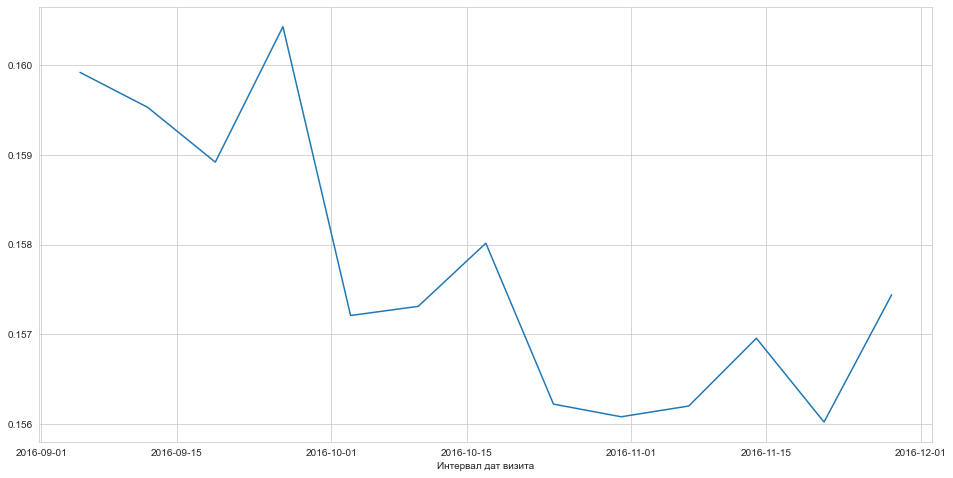

In [71]:
# визуализация среднедневного кол-ва визитов на посетителя
plt.figure(figsize=(16,8))
sns.lineplot(data=daily_average_visits_per_client)

2 задание

-рассчитать по каждой отчётной неделе (пн-вс) изменение за неделю и за год (неделя 2016 г. к той же неделе 2015 г.)

In [74]:
# Расчет по каждой отчётной неделе (пн-вс) изменение за неделю
df_diff_week = round(((df_resampled_weekly - df_resampled_weekly.shift(1)) / df_resampled_weekly.shift(1)) * 100, 2)
df_diff_week

,Визиты,Посетители,Просмотры
Интервал дат визита,,,
2016-09-05,NaN,NaN,NaN
2016-09-12,-21.74,-21.55,-16.38
2016-09-19,0.26,0.64,0.04
2016-09-26,35.15,33.88,37.58
2016-10-03,-3.92,-1.96,-6.58
2016-10-10,2.71,2.64,-0.09
2016-10-17,-16.40,-16.77,-15.06
2016-10-24,80.98,83.06,66.92
2016-10-31,-32.71,-32.65,-27.99


<AxesSubplot:xlabel='Интервал дат визита'>

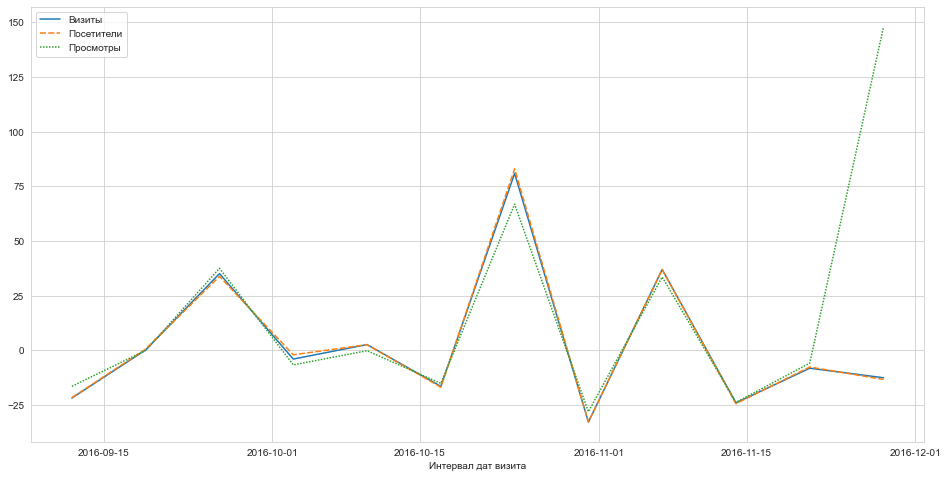

In [75]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df_diff_week)

In [76]:
# фильтруем понедельный датасет по нужному интервалу  за 2015 г
df_resampled_weekly_2015 = df_resampled.loc['2015-09-01':'2015-11-30']

In [77]:
# сброс индексов
df_resampled_weekly_2015 = df_resampled_weekly_2015.reset_index(drop=True)

In [78]:
df_resampled_weekly_2015

,Визиты,Посетители,Просмотры
0,719087,640759,1308437
1,599572,526248,1228604
2,537176,469695,1071836
3,729809,634911,1307614
4,1023316,918320,1683701
5,793969,709729,1360368
6,1102300,1018119,1736994
7,988105,896492,1576198
8,804404,720475,1397376
9,930523,839096,1584925


In [79]:
df_resampled_weekly = df_resampled_weekly.reset_index(drop=True)

In [80]:
df_resampled_weekly

,Визиты,Посетители,Просмотры
0,702995,628002,1094608
1,550150,492660,915271
2,551580,495837,915621
3,745469,663834,1259742
4,716212,650821,1176854
5,735614,668019,1175813
6,614995,555999,998737
7,1113021,1017786,1667133
8,748898,685437,1200441
9,1026283,938597,1603790


In [81]:
# рассчет по каждой отчётной неделе (пн-вс) за год (неделя 2016 г. к той же неделе 2015 г.)
df_diff_year = round(((df_resampled_weekly - df_resampled_weekly_2015) / df_resampled_weekly_2015) * 100, 2)

<AxesSubplot:>

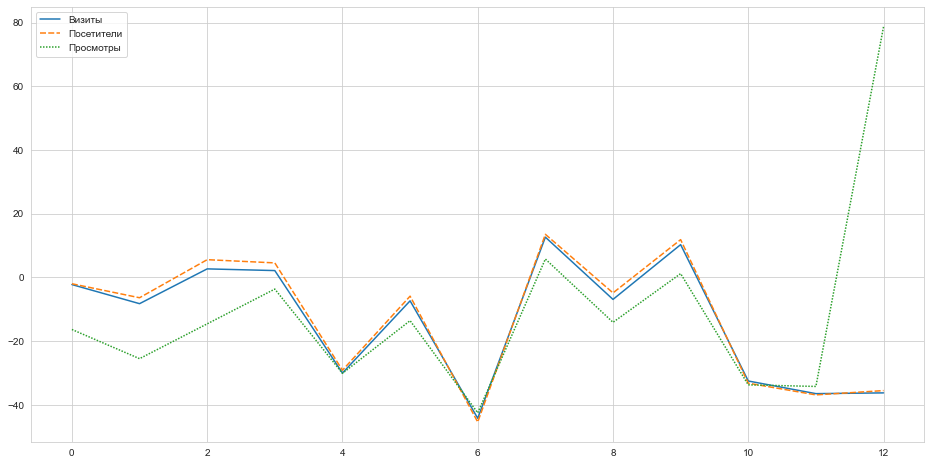

In [82]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df_diff_year)

3 задание

-построить помесячный прогноз трафика проекта на 2017 год (по визитам)

<AxesSubplot:xlabel='Интервал дат визита', ylabel='Визиты'>

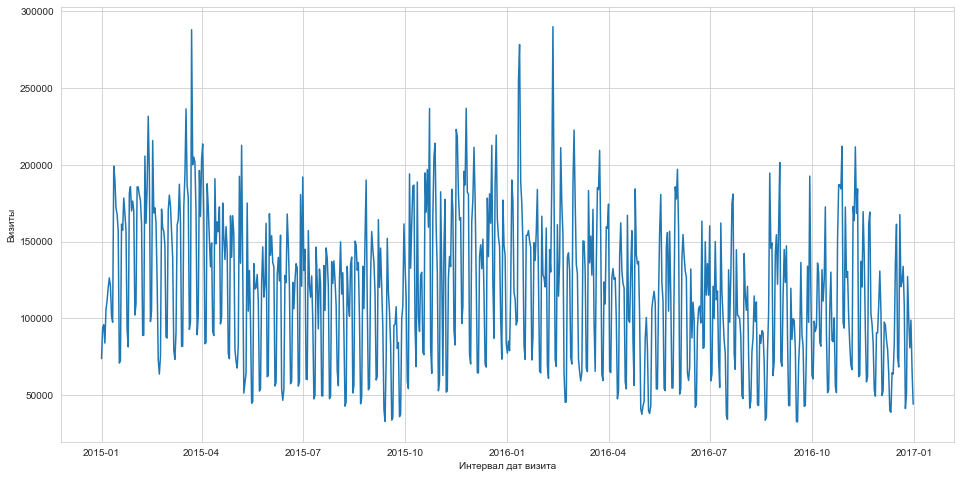

In [83]:
# график визитов по дням за весь период
plt.figure(figsize=(16,8))
sns.lineplot(data=df['Визиты'])

In [ ]:
# Посмотрим на тренд и сезонность отдельно

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose

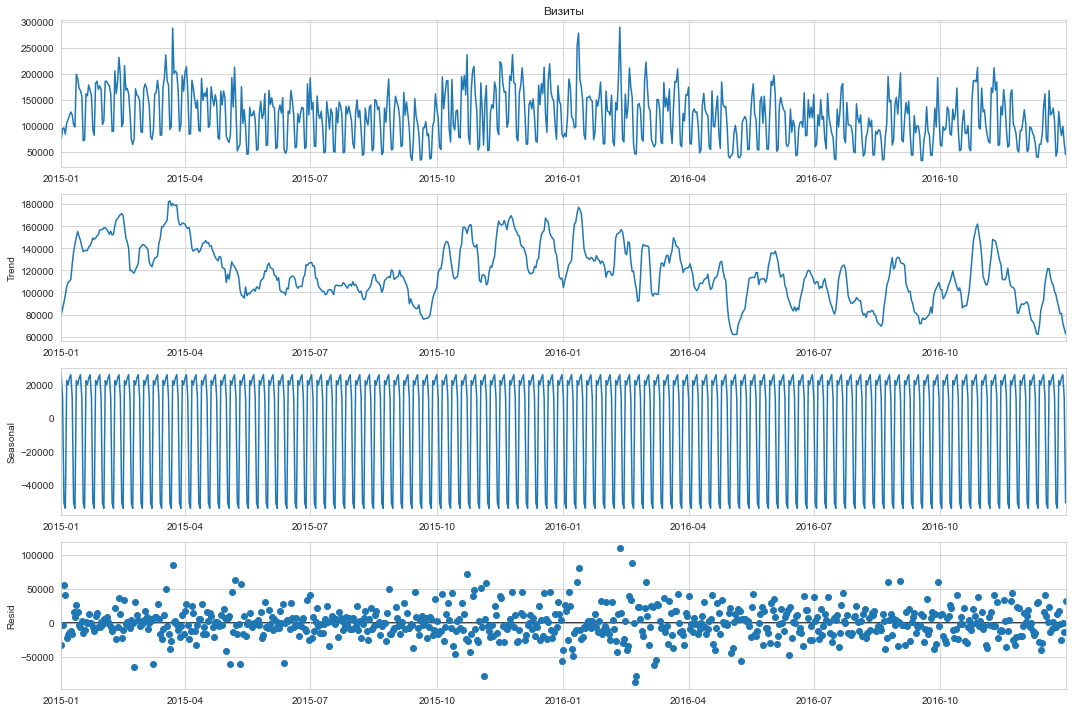

In [101]:
result_add = seasonal_decompose(df['Визиты'], extrapolate_trend = 'freq')

plt.rcParams.update({'figure.figsize': (15,10)})

result_add.plot()
plt.show()

Явный тренд отсутствует, сезонность недельная

In [1]:
# Импорт билблиотеки для прогноза от фейсбука prophet
from prophet import Prophet

In [20]:
from prophet.plot import add_changepoints_to_plot

11:20:01 - cmdstanpy - INFO - Chain [1] start processing
11:20:01 - cmdstanpy - INFO - Chain [1] done processing


          ds           yhat     yhat_lower     yhat_upper
0 2015-01-01  169375.592194  130725.403790  211857.970366
1 2015-01-02  155409.252646  113946.586124  199054.488828
2 2015-01-03   91714.883357   49147.694500  130488.768825
3 2015-01-04   88694.523031   46544.737685  128737.219341
4 2015-01-05  165885.423376  124777.020167  203702.966696


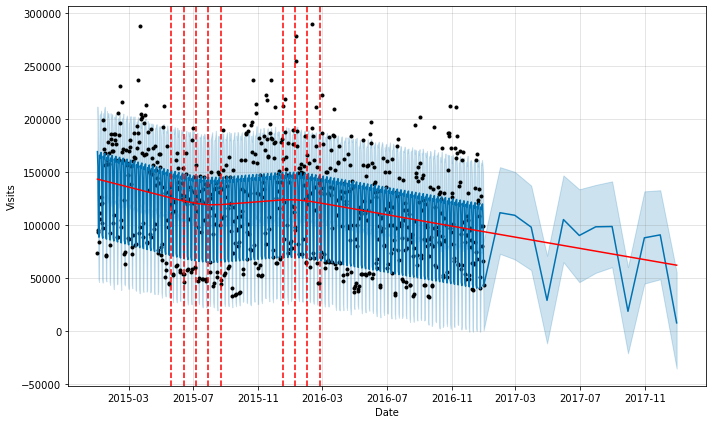

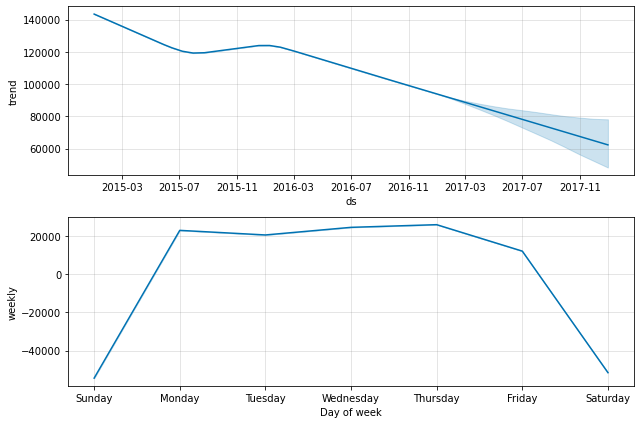

In [24]:

def forecasting(x, y, p, f):
    

    data = {'ds': x, 'y': y}
    df = pd.DataFrame(data, columns=['ds', 'y'])
    m = Prophet(growth='linear',
                changepoint_prior_scale=0.05,
                seasonality_mode='additive',
                daily_seasonality=False,
                weekly_seasonality=True,
                yearly_seasonality=False,
                holidays=None
                )

    m.fit(df)
    future = m.make_future_dataframe(periods = p, freq = f)
    forecast = m.predict(future)
    
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
    fig = m.plot(forecast, xlabel='Date', ylabel='Visits')
    add_changepoints_to_plot(fig.gca(), m, forecast)
    m.plot_components(forecast)
    plt.show()

forecasting(df.index,df['Визиты'],12, 'M')

Судя по прогнозу в 2017 году ожидается стабильное снижение количества визитов 